In [1]:
#libration_frequency.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 17 March 2018.
#plot phase-space diagrams for ringlets librating about their fixed point

In [2]:
#restore output
parent_folders = ['ring_mass_1.5e-10/', 'ring_mass_5.0e-10/', 
                  'ring_mass_1.5e-9/',  'ring_mass_5.0e-9/', 
                  'ring_mass_1.5e-8/',  'ring_mass_5.0e-8/' ]
total_ring_masses = []
da_list = []
de_list = []
dwt_list = []
a_avg_list = []
e_avg_list = []
omega_bgt_list = []
omega_list = []
from helper_fns import *
from libration import *
for parent_folder in parent_folders:
    #read simulation output
    input_file = parent_folder + "inputs.py"
    execfile(input_file)
    the_output_folder = parent_folder + output_folder
    print 'reading output in folder = ', the_output_folder
    r, t, vr, vt, times, lambda0 = restore_output(the_output_folder)
    a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
    print 'r.shape = ', r.shape
    print 'total_ring_mass = ', total_ring_mass
    total_ring_masses += [total_ring_mass]
    #get da, de, dwt differences at inner & outer streamline's periapse
    da, de, dwt, a_avg, e_avg = calculate_deltas(r, a, e, wt)
    da_list += [da]
    de_list += [de]
    dwt_list += [dwt]
    a_avg_list += [a_avg]
    e_avg_list += [e_avg]
    #BGT libration frequency and period
    GM = 1.0
    a3 = (a_avg**3).mean()
    a_over_da = (a_avg/da).mean()
    n = np.sqrt(GM/a3)
    H, q2 = H_q2(a_avg, e_avg, da, de, dwt)
    H_avg = 0.5*(H.min() + H.max())
    M_central = 1.0
    omega_bgt = (total_ring_mass/M_central)*(a_over_da**2)*n*H_avg/np.pi
    omega_bgt_list += [omega_bgt]
    print 'H_avg = ', H_avg
    print 'q_avg = ', np.sqrt(q2.mean())
    print 'BGT libration frequency = ', omega_bgt
    #compute libration phase & frequency
    de_eq = 0.5*(de.max() + de.min())
    Ix = (de - de_eq)*a_avg/da
    Iy = e_avg*a_avg*dwt/da
    phase = np.arctan2(Iy, Ix)
    phase_unrolled = unroll_angle(phase)
    coeff = np.polyfit(times, phase_unrolled, 1)
    omega = coeff[0]
    omega_list += [omega]
    print 'sim libration frequency = ', omega

reading output in folder =  ring_mass_1.5e-10/output
r.shape =  (501, 2, 101)
total_ring_mass =  1.5e-10
H_avg =  1.6721382835541792
q_avg =  0.9061434218404669
BGT libration frequency =  7.985867919393287e-05
sim libration frequency =  0.00019601673037174255
reading output in folder =  ring_mass_5.0e-10/output
r.shape =  (1001, 2, 101)
total_ring_mass =  5e-10
H_avg =  0.6941590589068505
q_avg =  0.594830049129155
BGT libration frequency =  0.00011050646177554044
sim libration frequency =  0.0001489763107544797
reading output in folder =  ring_mass_1.5e-9/output
r.shape =  (1001, 2, 101)
total_ring_mass =  1.5e-09
H_avg =  0.5219597590398892
q_avg =  0.23664150128267053
BGT libration frequency =  0.0002492797238081993
sim libration frequency =  0.00026140121170142
reading output in folder =  ring_mass_5.0e-9/output
r.shape =  (1001, 2, 101)
total_ring_mass =  5e-09
H_avg =  0.5020448672573923
q_avg =  0.07306018145980865
BGT libration frequency =  0.0007992289551184615
sim libration f

In [3]:
#libration period
omega = np.array(omega_list)
T_lib = 2.0*np.pi/omega
omega_bgt = np.array(omega_bgt_list)
T_lib_bgt = 2.0*np.pi/omega_bgt
ring_masses = np.array(total_ring_masses)

In [4]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set(font_scale=1.5, font='DejaVu Sans')
import numpy as np

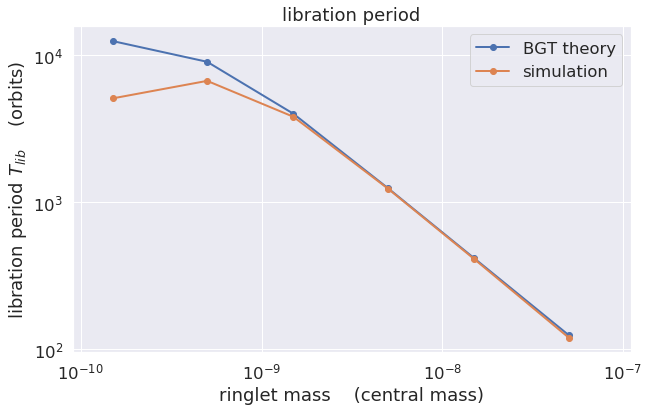

In [5]:
#plot T_lib vs total_ring_masses
x = ring_masses
y = T_lib_bgt/(2*np.pi)
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, marker='o', markersize=6, linestyle='-', linewidth=2, label='BGT theory')
y = T_lib/(2*np.pi)
p = ax.plot(x, y, marker='o', markersize=6, linestyle='-', linewidth=2, label='simulation')
p = ax.set_title('libration period')
p = ax.set_xlabel('ringlet mass    (central mass)')
p = ax.set_ylabel(r'libration period $T_{lib}$    (orbits)')
p = ax.set_xlim(9.0e-11, 1.1e-7)
p = ax.set_xscale('log')
p = ax.set_yscale('log')
p = plt.legend()